In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

d = pd.read_csv('CleanDatas.csv',encoding='latin1')


In [63]:
#d.head()


In [3]:
#sns.pairplot(d[['goal'],['Duration]],hue='state')

In [4]:
from sklearn.cross_validation import train_test_split
X=d.drop('state',axis=1,)
y=d['state']

C:\Users\AB Duke\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
X.head()

,ID,goal,Duration,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
0,1000003930,30000.0,45.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1000004038,45000.0,30.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1000007540,5000.0,35.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1000014025,50000.0,45.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1000023410,1000.0,30.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [6]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: state, dtype: int64

In [38]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y )

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train,y_train)
imp_fe=dtree.feature_importances_



In [40]:
prediction = dtree.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [42]:
print (confusion_matrix(y_test,prediction))
print('\n')
print (classification_report(y_test,prediction))
print('\n')
print (accuracy_score(y_test,prediction))
print('\n')
print ('Accuracy on training set:{:.3f}'.format(dtree.score(X_train,y_train)))
print ('Accuracy on training set:{:.3f}'.format(dtree.score(X_test,y_test)))

[[29266 16883]
 [16599 14318]]


             precision    recall  f1-score   support

          0       0.64      0.63      0.64     46149
          1       0.46      0.46      0.46     30917

avg / total       0.57      0.57      0.57     77066



0.5655412244050554


Accuracy on training set:1.000
Accuracy on training set:0.566


In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=12)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [13]:
print (confusion_matrix(y_test,rfc_pred))
print('\n')
print (classification_report(y_test,rfc_pred))
print('\n')
print (accuracy_score(y_test,rfc_pred))

[[55050 21865]
 [30589 20939]]


             precision    recall  f1-score   support

          0       0.64      0.72      0.68     76915
          1       0.49      0.41      0.44     51528

avg / total       0.58      0.59      0.58    128443



0.5916165147185911


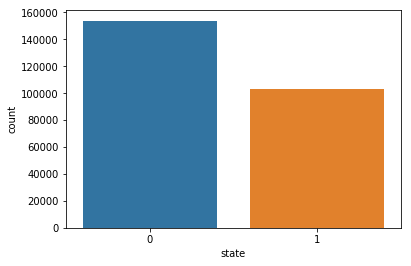

In [14]:
sns.countplot(d['state'])

In [15]:

#d[d['state']==1]['goal'].hist(bins=35,figsize=(10,10),color='blue',label = 'succes',alpha = 0.6)

#plt.legend()


In [16]:
#d[d['state']==0]['goal'].hist(bins=35,figsize=(10,10),color='red',label='failure',alpha = 0.6)

In [35]:
# scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data.shape

(256886, 17)

In [36]:
d_scale = pd.DataFrame(scaled_data,columns=list(X))

In [51]:
# decision tree for scaled data
X_train, X_test, y_train, y_test = train_test_split(d_scale, d['state'], test_size=0.33,stratify=d['state'])
dtree.fit(X_train,y_train)
scale_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,scale_pred))
print('\n')
print(classification_report(y_test,scale_pred))
print('\n')
print(accuracy_score(y_test,scale_pred))
print ('Accuracy on training set:{:.3f}'.format(dtree.score(X_train,y_train)))
print ('Accuracy on testing set:{:.3f}'.format(dtree.score(X_test,y_test)))



[[32194 18571]
 [18358 15650]]


             precision    recall  f1-score   support

          0       0.64      0.63      0.64     50765
          1       0.46      0.46      0.46     34008

avg / total       0.56      0.56      0.56     84773



0.5643778089721964
Accuracy on training set:1.000
Accuracy on testing set:0.564


In [20]:
rfc.fit(X_train,y_train)
scarfc_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,scarfc_pred))
print('\n')
print(classification_report(y_test,scarfc_pred))
print('\n')
print(accuracy_score(y_test,scarfc_pred))

[[36133 14632]
 [19968 14040]]


             precision    recall  f1-score   support

          0       0.64      0.71      0.68     50765
          1       0.49      0.41      0.45     34008

avg / total       0.58      0.59      0.58     84773



0.5918511790310594


In [32]:
# using 50%-50% data
df_bal = pd.read_csv('ClassbalKS.csv')
df_bal.head()
new_X=df_bal.drop(['state','ID'],axis=1)
new_X.head()
new_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
main_category_Comics          100000 non-null int64
main_category_Crafts          100000 non-null int64
main_category_Dance           100000 non-null int64
main_category_Design          100000 non-null int64
main_category_Fashion         100000 non-null int64
main_category_Film & Video    100000 non-null int64
main_category_Food            100000 non-null int64
main_category_Games           100000 non-null int64
main_category_Journalism      100000 non-null int64
main_category_Music           100000 non-null int64
main_category_Photography     100000 non-null int64
main_category_Publishing      100000 non-null int64
main_category_Technology      100000 non-null int64
main_category_Theater         100000 non-null int64
goal_cat_Low                  100000 non-null int64
goal_cat_Medium               100000 non-null int64
goal_cat_VeryHigh             100000 non-null int64
goal_c

In [64]:
# decision tree for balanced data set
X_train, X_test, y_train, y_test = train_test_split(new_X, df_bal['state'], test_size=0.33,stratify=df_bal['state'])
dtree.fit(X_train,y_train)
bal_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,bal_pred))
print('\n')
print(classification_report(y_test,bal_pred))
print('\n')
print(accuracy_score(y_test,bal_pred))
print ('Accuracy on training set:{:.3f}'.format(dtree.score(X_train,y_train)))
print ('Accuracy on testing set:{:.3f}'.format(dtree.score(X_test,y_test)))



[[ 9636  6864]
 [ 5571 10929]]


             precision    recall  f1-score   support

          0       0.63      0.58      0.61     16500
          1       0.61      0.66      0.64     16500

avg / total       0.62      0.62      0.62     33000



0.6231818181818182
Accuracy on training set:0.632
Accuracy on testing set:0.623


In [23]:
rfc.fit(X_train,y_train)
rfcbal_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfcbal_pred))
print('\n')
print(classification_report(y_test,rfcbal_pred))
print('\n')
print(accuracy_score(y_test,rfcbal_pred))


[[ 9353  7147]
 [ 5265 11235]]


             precision    recall  f1-score   support

          0       0.64      0.57      0.60     16500
          1       0.61      0.68      0.64     16500

avg / total       0.63      0.62      0.62     33000



0.6238787878787879


In [24]:
#BALANCED DATA SET WITH SCALING
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(new_X)
scaled_bal = scaler.transform(new_X)
scaled_bal.shape


(100000, 21)

In [25]:
#decision tree for balanced and scaled data set
X_train, X_test, y_train, y_test = train_test_split(scaled_bal, df_bal['state'], test_size=0.33,stratify=df_bal['state'])
dtree.fit(X_train,y_train)
bal_scale_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,bal_scale_pred))
print('\n')
print(classification_report(y_test,bal_scale_pred))
print('\n')
print(accuracy_score(y_test,bal_scale_pred))
print('imp:\n{}'.format(dtree.feature_importances_))

[[ 9799  6701]
 [ 5643 10857]]


             precision    recall  f1-score   support

          0       0.63      0.59      0.61     16500
          1       0.62      0.66      0.64     16500

avg / total       0.63      0.63      0.63     33000



0.6259393939393939
imp:
[0.01217639 0.03773541 0.01417139 0.00823072 0.06746992 0.00445606
 0.0204857  0.01177047 0.01324886 0.01506386 0.01853069 0.07881025
 0.11883286 0.0271507  0.0651156  0.0252871  0.38083451 0.05232896
 0.00644005 0.01166992 0.0101906 ]


In [26]:
#random forest scaled and balanced data
rfc.fit(X_train,y_train)
rfcscale_bal_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfcscale_bal_pred))
print('\n')
print(classification_report(y_test,rfcscale_bal_pred))
print('\n')
print(accuracy_score(y_test,rfcscale_bal_pred))


[[ 9749  6751]
 [ 5610 10890]]


             precision    recall  f1-score   support

          0       0.63      0.59      0.61     16500
          1       0.62      0.66      0.64     16500

avg / total       0.63      0.63      0.62     33000



0.6254242424242424


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gradt=GradientBoostingClassifier(random_state=0,max_depth=3)
gradt.fit(X_train,y_train)
grade_pred = gradt.predict(X_test)
print(confusion_matrix(y_test,grade_pred))
print('\n')
print(classification_report(y_test,grade_pred))
print('\n')
print(accuracy_score(y_test,grade_pred))
print ('Accuracy on training set:{:.3f}'.format(gradt.score(X_train,y_train)))
print ('Accuracy on testing set:{:.3f}'.format(gradt.score(X_test,y_test)))


[[35810 10339]
 [17046 13871]]


             precision    recall  f1-score   support

          0       0.68      0.78      0.72     46149
          1       0.57      0.45      0.50     30917

avg / total       0.64      0.64      0.64     77066



0.6446552305815795
Accuracy on training set:0.645
Accuracy on testing set:0.645


In [28]:
gradt=GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gradt.fit(X_train,y_train)
print ('Accuracy on training set:{:.3f}'.format(gradt.score(X_train,y_train)))
print ('Accuracy on training set:{:.3f}'.format(gradt.score(X_test,y_test)))
print ('imp features :\n{}'.format(gradt.feature_importances_))

Accuracy on training set:0.614
Accuracy on training set:0.614
imp features :
[1.91940004e-03 3.96620409e-03 0.00000000e+00 1.15371774e-02
 5.29031547e-02 0.00000000e+00 5.91702707e-03 1.44047530e-02
 0.00000000e+00 4.01837935e-02 0.00000000e+00 4.58862361e-02
 1.20076159e-01 4.55128826e-02 5.85248729e-02 0.00000000e+00
 5.48660686e-01 4.93458913e-02 0.00000000e+00 1.05159177e-03
 1.10170503e-04]


In [65]:
#def plot_important1(model):
  #  n_features = scaled_bal.data.shape[1]
   # plt.barh(range(n_features),model.feature_importances_,align = 'center')
   # plt.yticks(np.arange(n_features),d_scale.feature_names)
   # plt.xlabel('Feature Imp')
   # plt.ylabel('feature')
    #plt.ylim(-1,n_features)
    
#plot_important1(dtree)

In [18]:
#pca 2 comp
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X)
x_pca= pca.transform(X)
x_pca.shape

(256886, 4)

Text(0,0.5,'second PC')

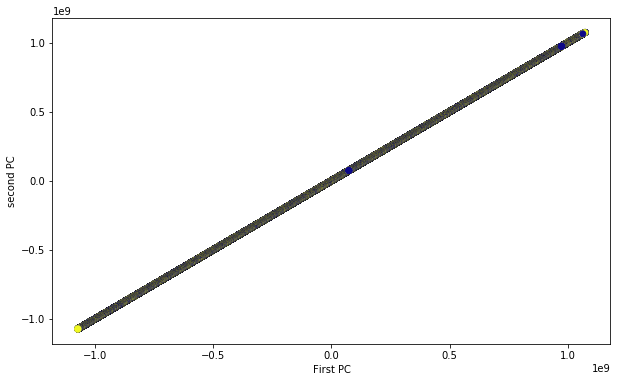

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,0],c=y,cmap='plasma')
plt.xlabel('First PC')
plt.ylabel('second PC')

In [20]:
pca.components_

array([[-1.00000000e+00, -2.70648692e-06, -4.80778985e-11,
         8.18131336e-13,  2.99668295e-13,  3.65892477e-13,
        -7.52622022e-13,  4.58950484e-13,  4.56524726e-13,
        -1.11105768e-12,  5.58327512e-13, -8.20370688e-14,
        -1.51121631e-13,  2.83073251e-13, -5.70846474e-14,
        -4.43062416e-13, -5.81679379e-14],
       [-2.70648692e-06,  1.00000000e+00,  5.95822284e-09,
        -3.39032652e-10, -3.56975348e-10, -2.50819802e-10,
        -6.21373635e-10, -8.73598905e-10,  2.82587494e-09,
         6.55775541e-10, -3.92820384e-10, -2.51267908e-11,
        -3.50787527e-09, -5.58187486e-10, -2.17620077e-09,
         5.83566638e-09, -6.55798769e-10],
       [-4.80616510e-11, -5.95775074e-09,  9.99999987e-01,
         1.83783721e-06, -1.81910082e-05, -5.24467523e-06,
        -6.78614113e-05, -1.78894138e-05,  6.53957863e-05,
        -2.71254986e-05,  4.42629140e-06, -4.87835176e-06,
         1.22911030e-05, -1.10329128e-06,  1.01602503e-04,
        -7.21140095e-05,  2.7

In [21]:
df_comp = pd.DataFrame(pca.components_,columns=list(X))
df_comp

,ID,goal,Duration,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
0,-1.000000e+00,-2.706487e-06,-4.807790e-11,8.181313e-13,2.996683e-13,3.658925e-13,-7.526220e-13,4.589505e-13,4.565247e-13,-1.111058e-12,5.583275e-13,-8.203707e-14,-1.511216e-13,2.830733e-13,-5.708465e-14,-4.430624e-13,-5.816794e-14
1,-2.706487e-06,1.000000e+00,5.958223e-09,-3.390327e-10,-3.569753e-10,-2.508198e-10,-6.213736e-10,-8.735989e-10,2.825875e-09,6.557755e-10,-3.928204e-10,-2.512679e-11,-3.507875e-09,-5.581875e-10,-2.176201e-09,5.835666e-09,-6.557988e-10
2,-4.806165e-11,-5.957751e-09,1.000000e+00,1.837837e-06,-1.819101e-05,-5.244675e-06,-6.786141e-05,-1.788941e-05,6.539579e-05,-2.712550e-05,4.426291e-06,-4.878352e-06,1.229110e-05,-1.103291e-06,1.016025e-04,-7.211401e-05,2.758079e-05
3,5.279324e-13,-4.035339e-09,-5.106842e-05,-1.054840e-02,-5.223708e-03,-3.120355e-03,-6.685034e-02,-3.287837e-02,8.783406e-01,-2.882076e-02,-7.357900e-02,-1.390786e-03,-4.495944e-01,-7.651605e-03,-1.036264e-01,-5.941951e-02,-1.050299e-02


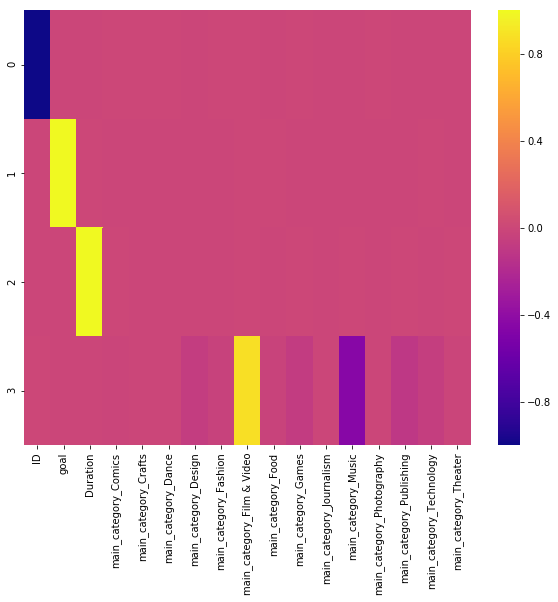

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df_comp,cmap='plasma')

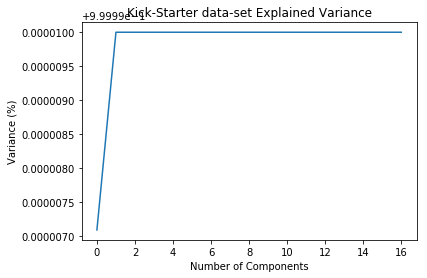

In [43]:
pca = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Kick-Starter data-set Explained Variance')
plt.show()

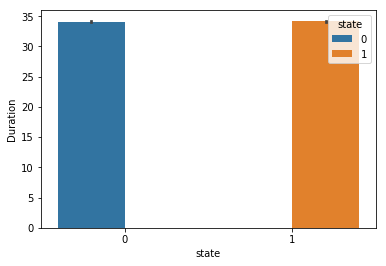

In [60]:
sns.barplot(x='state',y='Duration',data=d,hue='state')

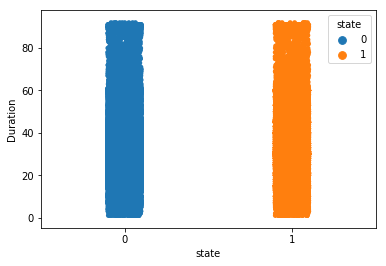

In [62]:
sns.stripplot(x='state',y='Duration',data=d,hue='state',jitter=True)